In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from os.path import expanduser
import seaborn as sns
from cmcrameri import cm
from matplotlib import colors
import matplotlib.patches as patches

In [2]:
DETECTS_3DID_NAME = 'minvi-600-2021-12-19-02-35-34'
DETECTS_3DID_DIR = '/media/big-ssd/results-P3856_YHE211-3did/{}/P3856_YHE211/features-3did'.format(DETECTS_3DID_NAME)
DETECTS_3DID_FILE = '{}/exp-P3856_YHE211-run-P3856_YHE211_1_Slot1-1_1_5104-features-3did-dedup.feather'.format(DETECTS_3DID_DIR)

In [3]:
# load the 3DID features classified as identifiable
detects_3did_df = pd.read_feather(DETECTS_3DID_FILE)

In [4]:
detects_3did_df.sample(n=4)

,index,mono_mz_lower,mono_mz_upper,scan_apex,scan_lower,scan_upper,inverse_k0_apex,rt_apex,rt_lower,rt_upper,...,voxel_id,voxel_metadata_d,scan_df,scan_r_squared,rt_df,rt_r_squared,number_of_frames,feature_id,prediction,identification_predicted
41928,11297,662.804016,662.846252,673.0,644.0,690.0,0.975797,1645.681396,1642.506592,1648.326294,...,570050619,"{""mz_lower"": 663.3, ""mz_upper"": 663.4, ""scan_l...","[{""scan"":611,""inverse_k0"":1.0074710846,""intens...",0.954634,"[{""frame_id"":14452,""retention_time_secs"":1633....",0.828156,12,145778,0.533508,True
71713,6276,743.364319,743.411682,133.0,118.0,138.0,1.250095,732.663635,731.089661,733.714417,...,650028904,"{""mz_lower"": 744.3000000000001, ""mz_upper"": 74...","[{""scan"":98,""inverse_k0"":1.2677513361,""intensi...",-0.466033,"[{""frame_id"":6600,""retention_time_secs"":721.10...",0.836805,6,242585,0.223675,True
142321,3388,1050.437622,1050.504517,493.0,483.0,509.0,1.067624,1914.554932,1909.554932,1925.138184,...,960029361,"{""mz_lower"": 1050.8, ""mz_upper"": 1050.9, ""scan...","[{""scan"":452,""inverse_k0"":1.0884844065,""intens...",0.940505,"[{""frame_id"":17092,""retention_time_secs"":1912....",0.825598,7,453962,0.710488,True
6135,2401,572.334839,572.371338,351.0,341.0,361.0,1.139786,891.821716,889.720642,893.923340,...,480005472,"{""mz_lower"": 573.3, ""mz_upper"": 573.4, ""scan_l...","[{""scan"":314,""inverse_k0"":1.1585483551,""intens...",0.946985,"[{""frame_id"":8120,""retention_time_secs"":880.79...",0.724564,9,22003,0.582924,True


In [5]:
detects_3did_df.loc[detects_3did_df.scan_apex.idxmax()][['scan_apex','inverse_k0_apex']]

scan_apex             916.0
inverse_k0_apex    0.851201
Name: 1, dtype: object

In [6]:
detects_3did_df.loc[detects_3did_df.scan_apex.idxmin()][['scan_apex','inverse_k0_apex']]

scan_apex              49.0
inverse_k0_apex    1.292446
Name: 86728, dtype: object

In [7]:
(1.292446-0.851201)/(916-49)*20

0.010178662053056517

In [8]:
detects_3did_df.columns

Index(['index', 'mono_mz_lower', 'mono_mz_upper', 'scan_apex', 'scan_lower',
       'scan_upper', 'inverse_k0_apex', 'rt_apex', 'rt_lower', 'rt_upper',
       'intensity_without_saturation_correction',
       'intensity_with_saturation_correction',
       'mono_intensity_adjustment_outcome', 'isotopic_peaks', 'isotope_count',
       'envelope', 'coelution_coefficient', 'mobility_coefficient',
       'voxels_processed', 'monoisotopic_mz', 'charge', 'neutral_mass',
       'monoisotopic_mass', 'feature_intensity', 'deconvolution_envelope',
       'deconvolution_score', 'feature_region_3d_extent', 'voxel_id',
       'voxel_metadata_d', 'scan_df', 'scan_r_squared', 'rt_df',
       'rt_r_squared', 'number_of_frames', 'feature_id', 'prediction',
       'identification_predicted'],
      dtype='object')

In [36]:
biosaur_name = 'P3856_YHE211_1_Slot1-1_1_5104-denoised-biosaur-mini-100-ac-25-minl-6.features.tsv'
DETECTS_BIOSAUR_FILE = '{}/{}'.format(expanduser('~'), biosaur_name)


In [37]:
detects_biosaur_df = pd.read_csv(DETECTS_BIOSAUR_FILE, sep='\\t', engine='python')

In [38]:
detects_biosaur_df = detects_biosaur_df[(detects_biosaur_df.nIsotopes >= 3)]

In [39]:
detects_biosaur_df.loc[detects_biosaur_df.ion_mobility.idxmax()].ion_mobility

1.2843854495463003

In [40]:
detects_biosaur_df.columns

Index(['massCalib', 'rtApex', 'intensityApex', 'charge', 'nIsotopes', 'nScans',
       'sulfur', 'cos_corr_1', 'cos_corr_2', 'diff_for_output',
       'corr_fill_zero', 'intensity_1', 'scan_id_1', 'mz_std_1', 'intensity_2',
       'scan_id_2', 'mz_std_2', 'mz', 'rtStart', 'rtEnd', 'id', 'ion_mobility',
       'FAIMS', 'targeted_mode'],
      dtype='object')

In [41]:
# corresponds to about the same scan tolerance as 20 scans over 910
DUP_INVERSE_K0 = (detects_3did_df.inverse_k0_apex.max()-detects_3did_df.inverse_k0_apex.min())*(20/910) * 4
DUP_INVERSE_K0 = 0.03

In [42]:
# definition of a duplicate feature
DUP_MZ_TOLERANCE_PPM = 10
DUP_RT_TOLERANCE = 5

In [43]:
# set up dup definitions
MZ_TOLERANCE_PERCENT = DUP_MZ_TOLERANCE_PPM * 10**-4
detects_biosaur_df['dup_mz_ppm_tolerance'] = detects_biosaur_df.mz * MZ_TOLERANCE_PERCENT / 100
detects_biosaur_df['dup_mz_lower'] = detects_biosaur_df.mz - detects_biosaur_df.dup_mz_ppm_tolerance
detects_biosaur_df['dup_mz_upper'] = detects_biosaur_df.mz + detects_biosaur_df.dup_mz_ppm_tolerance
detects_biosaur_df['dup_inverse_k0_lower'] = detects_biosaur_df.ion_mobility - DUP_INVERSE_K0
detects_biosaur_df['dup_inverse_k0_upper'] = detects_biosaur_df.ion_mobility + DUP_INVERSE_K0
detects_biosaur_df['dup_rt_lower'] = detects_biosaur_df.rtApex - DUP_RT_TOLERANCE
detects_biosaur_df['dup_rt_upper'] = detects_biosaur_df.rtApex + DUP_RT_TOLERANCE

In [44]:
# find the features detected by 3DID and Biosaur
matched_features_3did = set()
matched_features_biosaur = set()

for row in detects_3did_df.itertuples():
    df = detects_biosaur_df[(row.charge == detects_biosaur_df.charge) & (row.monoisotopic_mz >= detects_biosaur_df.dup_mz_lower) & (row.monoisotopic_mz <= detects_biosaur_df.dup_mz_upper) & (row.inverse_k0_apex >= detects_biosaur_df.dup_inverse_k0_lower) & (row.inverse_k0_apex <= detects_biosaur_df.dup_inverse_k0_upper) & (row.rt_apex >= detects_biosaur_df.dup_rt_lower) & (row.rt_apex <= detects_biosaur_df.dup_rt_upper)]
    if len(df) > 0:
        matched_features_3did.update(set([row.feature_id]))
        matched_features_biosaur.update(set(df.id.tolist()))

In [45]:
contained_in_3did_not_biosaur = len(detects_3did_df) - len(matched_features_3did)
contained_in_biosaur_not_3did = len(detects_biosaur_df) - len(matched_features_biosaur)
contained_in_both = len(matched_features_biosaur)

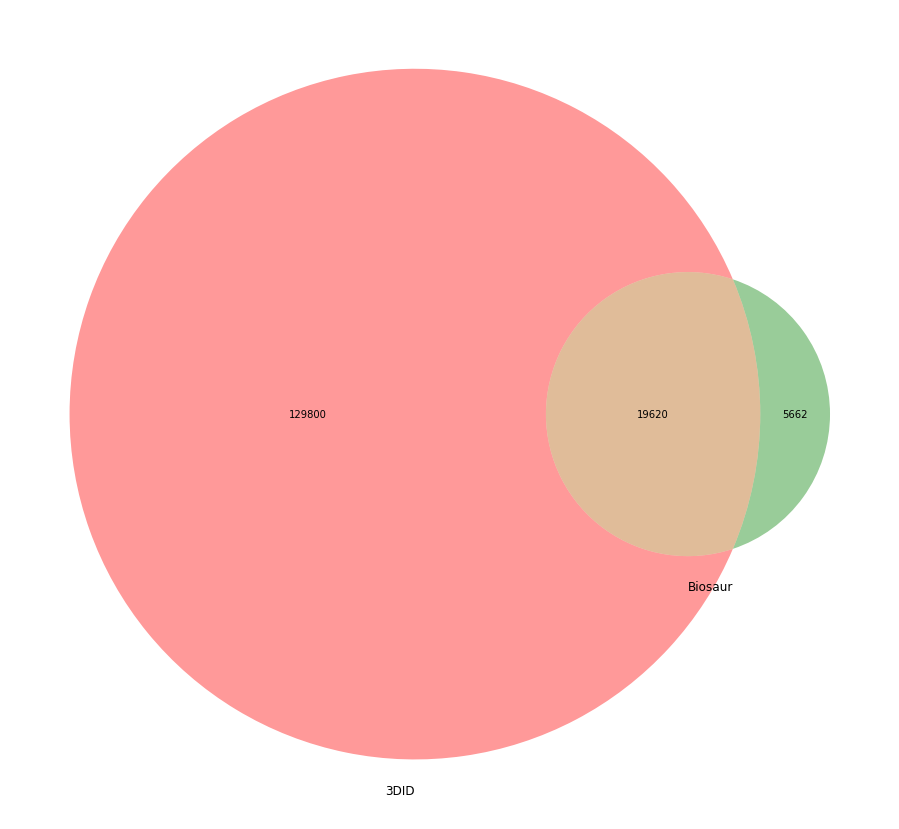

In [46]:
f, ax = plt.subplots()
f.set_figheight(15)
f.set_figwidth(20)

plt.margins(0.06)

venn2(subsets = (contained_in_3did_not_biosaur, contained_in_biosaur_not_3did, contained_in_both), set_labels = ('3DID', 'Biosaur'))
plt.show()

In [47]:
matched_3did_df = detects_3did_df[detects_3did_df.feature_id.isin(matched_features_3did)]

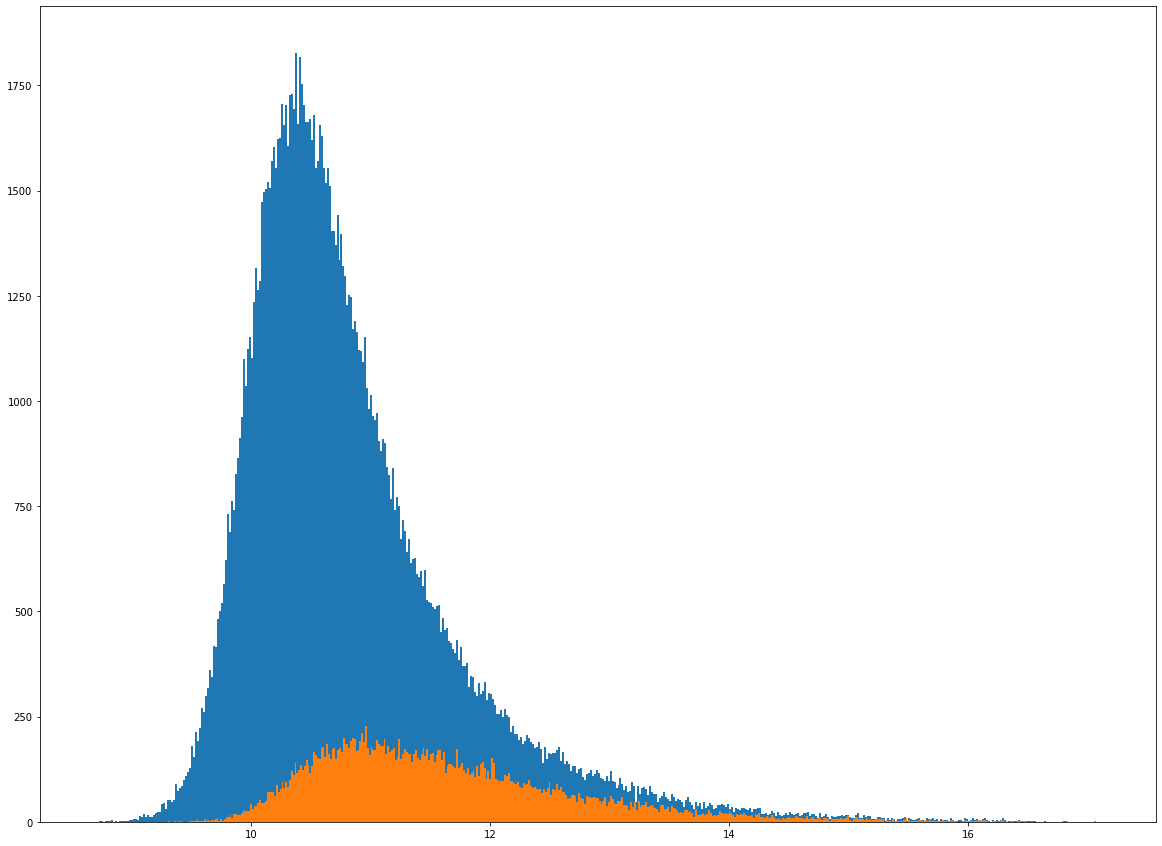

In [48]:
f, ax = plt.subplots()
f.set_figheight(15)
f.set_figwidth(20)

plt.margins(0.06)

bins = 500
values = np.log2(detects_3did_df.feature_intensity)
y, x, _ = ax.hist(values, bins=bins, label='detected')

values = np.log2(matched_3did_df.feature_intensity)
y, x, _ = ax.hist(values, bins=bins, label='matched')

plt.show()